In [47]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
path_to_csv = "/content/drive/MyDrive/UIT - Semester 6/Data Analysis in Business/Dataset"

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [50]:
df = pd.read_csv(path_to_csv + "/SONY.csv")

In [51]:
df = df[["Date", "Close"]]

In [52]:
df["Date"] = pd.to_datetime(df["Date"])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1389 non-null   datetime64[ns]
 1   Close   1389 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.8 KB


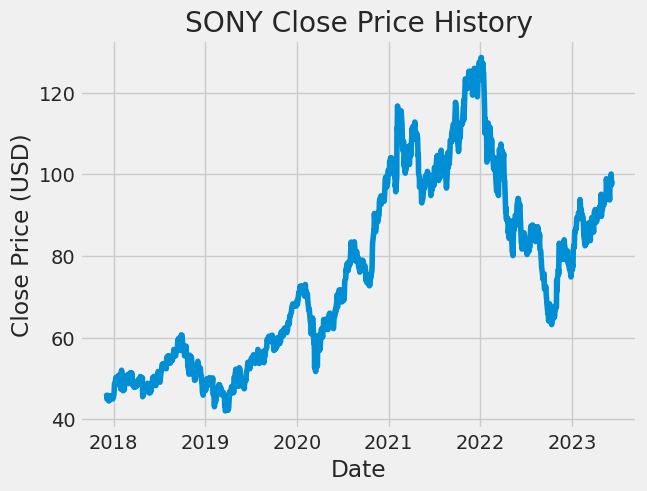

In [54]:
plt.title("SONY Close Price History")

plt.plot(df["Date"], df["Close"])

plt.xlabel("Date")
plt.ylabel("Close Price (USD)")

plt.show()

In [55]:
import math

close_prices = df["Close"]
values = close_prices.values
data_len = len(values)

train_len = math.floor(data_len * 0.7)
test_len = math.floor(data_len * 0.2)
val_len = data_len - train_len - test_len

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values.reshape(-1, 1))

In [56]:
# Training data
train_data = scaled_data[:train_len]
x_train = []
y_train = []

for i in range(7, len(train_data)):
    x_train.append(train_data[i-7:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [57]:
# Testing data
test_data = scaled_data[train_len:train_len+test_len]
x_test = []
y_test = []

for i in range(7, len(test_data)):
    x_test.append(test_data[i-7:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [58]:
# Validation data
val_data = scaled_data[train_len+test_len:train_len+test_len+val_len]
x_val = []
y_val = []

for i in range(7, len(val_data)):
    x_val.append(val_data[i-7:i, 0])
    y_val.append(val_data[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 7, 100)            40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 10, epochs=100)

Epoch 1/100
97/97 [==============================] - 5s 14ms/step - loss: 0.0085
Epoch 2/100
97/97 [==============================] - 2s 18ms/step - loss: 0.0011
Epoch 3/100
97/97 [==============================] - 2s 18ms/step - loss: 7.7605e-04
Epoch 4/100
97/97 [==============================] - 1s 15ms/step - loss: 7.8748e-04
Epoch 5/100
97/97 [==============================] - 1s 13ms/step - loss: 8.7601e-04
Epoch 6/100
97/97 [==============================] - 1s 13ms/step - loss: 8.3795e-04
Epoch 7/100
97/97 [==============================] - 1s 13ms/step - loss: 7.4455e-04
Epoch 8/100
97/97 [==============================] - 1s 13ms/step - loss: 7.2497e-04
Epoch 9/100
97/97 [==============================] - 1s 13ms/step - loss: 7.4933e-04
Epoch 10/100
97/97 [==============================] - 1s 13ms/step - loss: 8.1382e-04
Epoch 11/100
97/97 [==============================] - 1s 12ms/step - loss: 7.2877e-04
Epoch 12/100
97/97 [==============================] - 2s 16ms/step - lo

In [61]:
predict_test = model.predict(x_test)
predict_test = scaler.inverse_transform(predict_test)
predict_test

9/9 [==============================] - 1s 6ms/step


array([[112.38613 ],
       [113.11269 ],
       [115.56915 ],
       [116.885994],
       [113.239555],
       [117.961136],
       [116.27115 ],
       [121.09602 ],
       [123.79552 ],
       [123.00417 ],
       [122.03729 ],
       [122.7378  ],
       [123.11717 ],
       [122.22621 ],
       [121.10533 ],
       [120.73188 ],
       [122.84839 ],
       [123.07828 ],
       [124.94187 ],
       [124.07829 ],
       [124.68789 ],
       [124.9389  ],
       [121.9613  ],
       [121.17512 ],
       [122.07364 ],
       [121.2903  ],
       [121.29323 ],
       [121.79436 ],
       [119.236275],
       [119.82223 ],
       [120.08946 ],
       [121.02374 ],
       [124.8961  ],
       [126.137794],
       [122.358154],
       [122.404724],
       [120.27036 ],
       [120.26466 ],
       [123.98014 ],
       [122.48264 ],
       [120.68235 ],
       [118.53686 ],
       [120.318504],
       [123.410805],
       [124.101105],
       [127.06237 ],
       [127.310425],
       [126.0

In [62]:
predict_val = model.predict(x_val)
predict_val = scaler.inverse_transform(predict_val)
predict_val

5/5 [==============================] - 0s 5ms/step


array([[ 82.45419 ],
       [ 82.35622 ],
       [ 83.25761 ],
       [ 84.26196 ],
       [ 83.20758 ],
       [ 81.86285 ],
       [ 79.807014],
       [ 79.326775],
       [ 79.6327  ],
       [ 80.80988 ],
       [ 80.664764],
       [ 81.22112 ],
       [ 81.49018 ],
       [ 79.06549 ],
       [ 78.484   ],
       [ 78.05249 ],
       [ 77.89181 ],
       [ 77.82194 ],
       [ 77.17154 ],
       [ 77.19794 ],
       [ 75.94337 ],
       [ 75.119514],
       [ 76.82708 ],
       [ 76.735054],
       [ 76.866554],
       [ 77.93273 ],
       [ 77.76608 ],
       [ 81.30125 ],
       [ 82.959816],
       [ 82.29198 ],
       [ 84.16627 ],
       [ 86.23194 ],
       [ 86.048225],
       [ 86.84694 ],
       [ 86.92715 ],
       [ 88.14769 ],
       [ 89.61412 ],
       [ 89.30441 ],
       [ 89.506004],
       [ 89.83096 ],
       [ 89.47616 ],
       [ 90.87072 ],
       [ 89.84532 ],
       [ 89.70525 ],
       [ 89.906136],
       [ 94.077736],
       [ 93.85359 ],
       [ 90.3

In [63]:
data = df.filter(["Close"])

train = data[:train_len]
test = data[train_len:train_len+test_len-7]
val = data[train_len+test_len-7:-14]

test["Predictions"] = predict_test
val["Predictions"] = predict_val

<ipython-input-63-88aa3cc5d842>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = predict_test
<ipython-input-63-88aa3cc5d842>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["Predictions"] = predict_val


In [64]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[30:].reshape(1, -1)
x_input_shape = x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.5158272  0.53073017 0.54597971 0.54158973 0.54621073 0.54898343
 0.54413123 0.56122925 0.54644183 0.54794364 0.54898343 0.59808232
 0.59034196 0.55556846 0.57000931 0.5590342  0.55556846 0.55556846
 0.55002312 0.54655729 0.53592884 0.52576252 0.49711184 0.47608596
 0.46730598 0.46961648 0.46996305 0.47735675 0.48001391 0.48059149
 0.4772412  0.50496766 0.51409429 0.52252778 0.53176988 0.51444086
 0.49364608 0.50288818 0.5015019  0.4818623  0.51247691 0.51397874
 0.53592884 0.54690395 0.52460726 0.53419593 0.52564697 0.51536508
 0.5058919  0.52957493 0.54621073 0.56169137 0.56954719 0.56585033
 0.55013869 0.53304067 0.53696863 0.54158973 0.54771262 0.55984289
 0.56411742 0.56746771 0.56931609 0.56538821 0.57012477 0.57786513
 0.57220426 0.56296216 0.59819779 0.6129852  0.55036969 0.57948249
 0.56989376 0.58664511 0.58502774 0.59877546 0.58237066 0.59923758
 0.5938078  0.59126619 0.60824865 0.6081331  0.59819779 0.61564236
 0.65688542 0.6467191  0.64198245 0.61159894 0.603

In [65]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [66]:
test_rmse = np.sqrt(np.mean((predict_test - y_test)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 2.0505654543757657


In [67]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(predict_test , y_test)
print("Testing MAE: {}".format(test_mae))

Testing MAE: 1.5646968564941413


In [68]:
from sklearn.metrics import mean_absolute_percentage_error

test_mape = mean_absolute_percentage_error(y_test, predict_test)
print("Testing MAPE: ", test_mape)

Testing MAPE:  0.01673235906398838


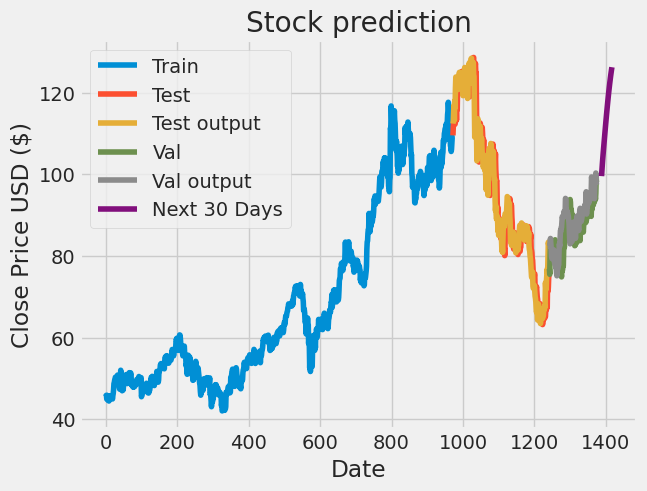

In [69]:
plt.title('Stock prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(train)
plt.plot(test[["Close", "Predictions"]])
plt.plot(val[["Close", "Predictions"]])

prediect_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))

plt.legend(["Train", "Test", "Test output", "Val", "Val output", "Next 30 Days"])